<a href="https://colab.research.google.com/github/majorquev/DBDC_202507_Programacion_en_R_para_ciencia_de_datos/blob/main/Evaluaciones/C3/Evaluacion_final_pauta_V19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección 1
## Introducción
Los datos que se proporcionan a continuación contienen el detalle de la información de los cliente registrados en una tienda, junto con algunos descriptores de su comportamiento transaccional durante los últimos 2 años.
El archivo  `marketing_campaign.csv` contiene los siguientes campos:

**Cliente**

 * `ID`: Identificador único del cliente
 * `Year_Birth`: Año de nacimiento del cliente
 * `Education`: Nivel educativo del cliente
 * `Marital_Status`: Estado civil del cliente. El cual contiene las siguientes categorías.

| Categoría        | Qué representa                                                                                           |
| ------------ | -------------------------------------------------------------------------------------------------------- |
| **Married**  | Persona legalmente casada.|                                                                         |
| **Together** | Pareja que convive pero no está casada (unión libre/conviviente).|
| **Single**   | Soltero/a: nunca se ha casado ni convive en pareja.              |
| **Divorced** | Persona divorciada legalmente (o separada).                      |
| **Widow**    | Viudo/a.                                                         |
| **Alone**    | Vive solo/a. No necesariamente soltero (podría estar separado, viudo, etc.), pero se autodeclara “solo”. |
| **YOLO**     | Respuesta absurda (“You Only Live Once”). Indica que el encuestado no quiso contestar seriamente.        |
| **Absurd**   | Otra respuesta no válida o humorística.                                                                  |

 * `Income`: Ingreso anual del hogar del cliente
 * `Kidhome`: Número de niños en el hogar del cliente
 * `Teenhome`: Número de adolescentes en el hogar del cliente
 * `Dt_Customer`: Fecha de inscripción del cliente en la empresa
 * `Recency`: Número de días desde la última compra del cliente
 * `Complain`: 1 si el cliente presentó una queja en los últimos 2 años, 0 en caso contrario

**Productos**

 * `MntWines`: Monto gastado en vino en los últimos 2 años
 * `MntFruits`: Monto gastado en frutas en los últimos 2 años
 * `MntMeatProducts`: Monto gastado en carne en los últimos 2 años
 * `MntFishProducts`: Monto gastado en pescado en los últimos 2 años
 * `MntSweetProducts`: Monto gastado en dulces en los últimos 2 años
 * `MntGoldProds`: Monto gastado en productos de oro en los últimos 2 años

**Campañas de descuentos**

 * `NumDealsPurchases`: Número de compras realizadas con descuento
 * `AcceptedCmp1`: 1 si el cliente aceptó la oferta en la 1.ª campaña, 0 en caso contrario
 * `AcceptedCmp2`: 1 si el cliente aceptó la oferta en la 2.ª campaña, 0 en caso contrario
 * `AcceptedCmp3`: 1 si el cliente aceptó la oferta en la 3.ª campaña, 0 en caso contrario
 * `AcceptedCmp4`: 1 si el cliente aceptó la oferta en la 4.ª campaña, 0 en caso contrario
 * `AcceptedCmp5`: 1 si el cliente aceptó la oferta en la 5.ª campaña, 0 en caso contrario
 * `Response`: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

**Frecuencia de compras**

 * `NumWebPurchases`: Número de compras realizadas a través del sitio web de la empresa
 * `NumCatalogPurchases`: Número de compras realizadas mediante catálogo
 * `NumStorePurchases`: Número de compras realizadas directamente en tiendas
 * `NumWebVisitsMonth`: Número de visitas al sitio web de la empresa en el último mes

 Usted deberá realizar un análisis exploratorio de esta información con el objetivo de poder caracterizar a los clientes de esta tienda.

## Preliminar

**P0a) (1pt)** Cargue el archivo `marketing_campaign.csv` mediante la función `read.table()`. Tenga en cuenta que las columnas están separadas por _tabulador_ `\t`, y que la primera fila contiene los nombres de los campos (considere el parámetro `header = T`)


In [ ]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(ggplot2)
library(arules)
clientes <- read.table("marketing_campaign.csv", sep = "\t", h = T)
head(clientes)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write




,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


**P0b) (2pts)** Verifique que el campo `Income` contiene valores nulos (`NA`). Reemplace dichos registros por el valor promedio de `Income`.

In [ ]:
income_prom <- mean(clientes$Income, na.rm = T)
clientes <- clientes %>%
  mutate(Income = ifelse(is.na(Income),income_prom, Income ))

In [ ]:
summary(clientes)

       ID          Year_Birth    Education         Marital_Status    
 Min.   :    0   Min.   :1893   Length:2240        Length:2240       
 1st Qu.: 2828   1st Qu.:1959   Class :character   Class :character  
 Median : 5458   Median :1970   Mode  :character   Mode  :character  
 Mean   : 5592   Mean   :1969                                        
 3rd Qu.: 8428   3rd Qu.:1977                                        
 Max.   :11191   Max.   :1996                                        
     Income          Kidhome          Teenhome      Dt_Customer       
 Min.   :  1730   Min.   :0.0000   Min.   :0.0000   Length:2240       
 1st Qu.: 35539   1st Qu.:0.0000   1st Qu.:0.0000   Class :character  
 Median : 51742   Median :0.0000   Median :0.0000   Mode  :character  
 Mean   : 52247   Mean   :0.4442   Mean   :0.5062                     
 3rd Qu.: 68290   3rd Qu.:1.0000   3rd Qu.:1.0000                     
 Max.   :666666   Max.   :2.0000   Max.   :2.0000                     
    Recency  

 ## Preguntas 1.1
**P1a) (6pt)** Para guiar su análisis considere crear los siguientes nuevos atributos para cada cliente.

 * `monto_total`: definido como la suma de los montos por concepto de vino, fruta, carne, pescado, dulces y productos de oro.
 * `frequencia`: definido como el total de compras ya sea directo en tienda, catálogo o sitio web de la empresa (refiérase a los campos relacionados a "Frecuencia de compra".
 * `tiene_hijos`: "SI" si es que el cliente tiene al menos un niño o adolecente en el hogar. "NO" en caso contrario.
 * `RatioGastosIngresos`: definido como el cuociente `monto_total/Income`. Busca cuantificar la proporción de gastos en productos de la tienda por sobre los ingresos del cliente.
 * `tasa_conversion_web`: cuociente entre Total de compras por la web y el total de compras del cliente (`NumWebPurchases/frequencia`)
 * `Marital_Status2`: Recodificación de `Marital_Status` como; "Single" si el estado es "Alone". "Desconocido" si el estado es "YOLO" o "Absurd".   <br><br>










In [ ]:
## Respuesta
clientes <- clientes %>%
  mutate(monto_total = MntWines+MntFruits+MntMeatProducts+MntFishProducts+MntSweetProducts+MntGoldProds,
         frecuencia = NumWebPurchases+NumCatalogPurchases+NumStorePurchases,
         tiene_hijos = ifelse(Kidhome+Teenhome > 0, "SI", "NO"),
         RatioGastosIngresos = monto_total/Income,
         tasa_conversion_web = NumWebPurchases/frecuencia,
         Marital_Status2 = case_when(Marital_Status == "Alone" ~ "Single",
                                     Marital_Status %in% c("YOLO","Absurd") ~"Desconocido",
                                     TRUE ~Marital_Status))
head(clientes)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,Complain,Z_CostContact,Z_Revenue,Response,monto_total,frecuencia,tiene_hijos,RatioGastosIngresos,tasa_conversion_web,Marital_Status2
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,0,3,11,1,1617,22,NO,0.0278131343,0.3636364,Single
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,0,3,11,0,27,4,SI,0.0005825997,0.2500000,Single
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,0,3,11,0,776,20,NO,0.0108360214,0.4000000,Together
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,0,3,11,0,53,6,SI,0.0019890415,0.3333333,Together
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,0,3,11,0,422,14,SI,0.0072392912,0.3571429,Married
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,0,3,11,0,716,20,SI,0.0114536176,0.3000000,Together



 **P1b) (9pt)** Cómo política de la tienda, se busca caracterizar a los clientes según su `frecuencia` de compra en la tienda. Para ello considere la elaboración de:
  * Un boxplot, un gráfico de barras y una tabla que describa la relación entre `frecuencia`  de compra promedio y `Education`.
  * Un boxplot,  un gráfico de barras y una tabla que describa la relación entre `frecuencia` de compra promedio y `Marital_Status2`.
  * Un boxplot,  un gráfico de barras y una tabla que describa la relación entre `frecuencia` de compra promedio y `tiene_hijos`.

¿Cuáles son las categorías clientes con mayor/menor frecuencia de compra promedio?. Comente con base en las tablas de resumen y sus gráficos.

In [ ]:
## Respuesta
# Tablas resumen por concepto
freqByeducation <- clientes %>%
  group_by(Education) %>%
  summarise(frecuencia_prom = mean(frecuencia))

freqByMarEst <- clientes %>%
  group_by(Marital_Status2) %>%
  summarise(frecuencia_prom = mean(frecuencia))

freqByHijos <- clientes %>%
  group_by(tiene_hijos) %>%
  summarise(frecuencia_prom = mean(frecuencia))
# Según cada tabla/gráfico es puede observar que los clientes con mayor frecuencia de compra tienen niveles de estudios de doctorado (PhD),  o son viudos (Widow) - luego de Desconocido -, o no tienen hijos.
# Según cada tabla/gráfico es puede observar que los clientes con menor frecuencia de compra tienen niveles de estudios básicos (Basic),  o están Solteros (Single), o tienen hijos.

freqByeducation %>% arrange(desc(frecuencia_prom))
freqByMarEst %>% arrange(desc(frecuencia_prom))
freqByHijos %>% arrange(desc(frecuencia_prom))

Education,frecuencia_prom
<chr>,<dbl>
PhD,13.454733
Graduation,12.680568
Master,12.500000
2n Cycle,11.556650
Basic,5.222222


Marital_Status2,frecuencia_prom
<chr>,<dbl>
Desconocido,15.75000
Widow,14.36364
Divorced,12.80172
Married,12.56366
Together,12.49310
Single,12.09731


tiene_hijos,frecuencia_prom
<chr>,<dbl>
NO,16.41693
SI,10.99189


In [ ]:
# Para cada concepto podemos generar (por ejemplo) gráficos de barra o boxplots  para describir la frecuencia en función de las otras variables
## Barras (pueden generar 3 gráficos distintos y está bien...)
freqByeducation$dimension <- "Education"
freqByMarEst$dimension <- "Marital Status"
freqByHijos$dimension <- "Tiene Hijos"

freqByeducation <- freqByeducation %>% rename(categoria = Education )
freqByMarEst <- freqByMarEst %>% rename(categoria = Marital_Status2 )
freqByHijos <- freqByHijos %>% rename(categoria = tiene_hijos )

resumen <- bind_rows(freqByeducation,freqByMarEst,freqByHijos)



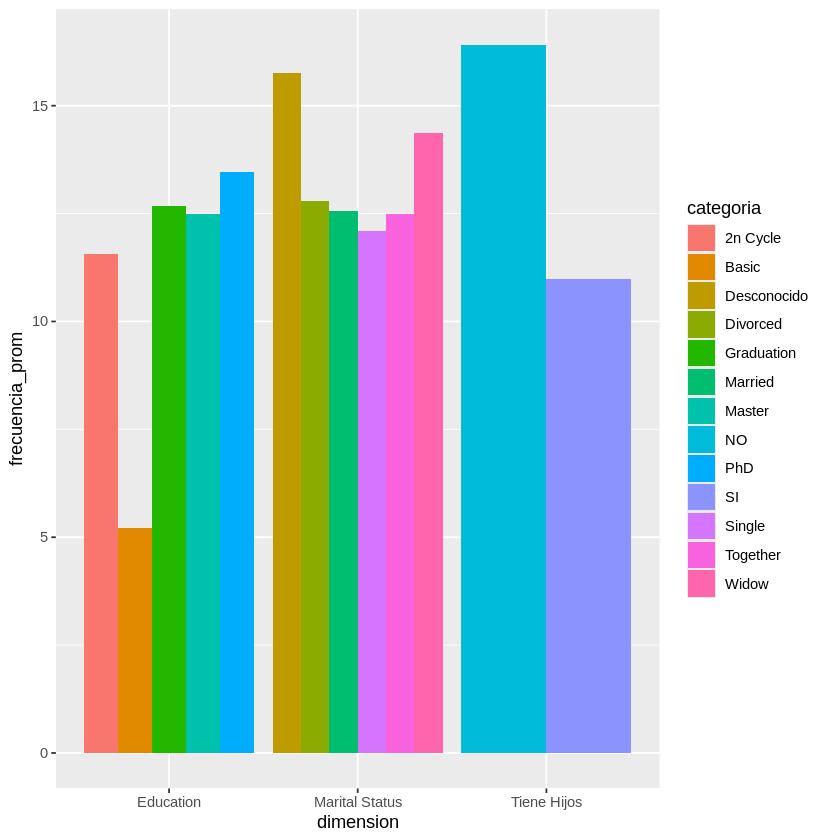

In [ ]:
resumen %>%
  ggplot() +
    aes(x = dimension, y = frecuencia_prom, fill = categoria) +
    geom_bar(stat = "identity",position = "dodge")


In [ ]:
freqByeducation

categoria,frecuencia_prom,dimension
<chr>,<dbl>,<chr>
2n Cycle,11.556650,Education
Basic,5.222222,Education
Graduation,12.680568,Education
Master,12.500000,Education
PhD,13.454733,Education


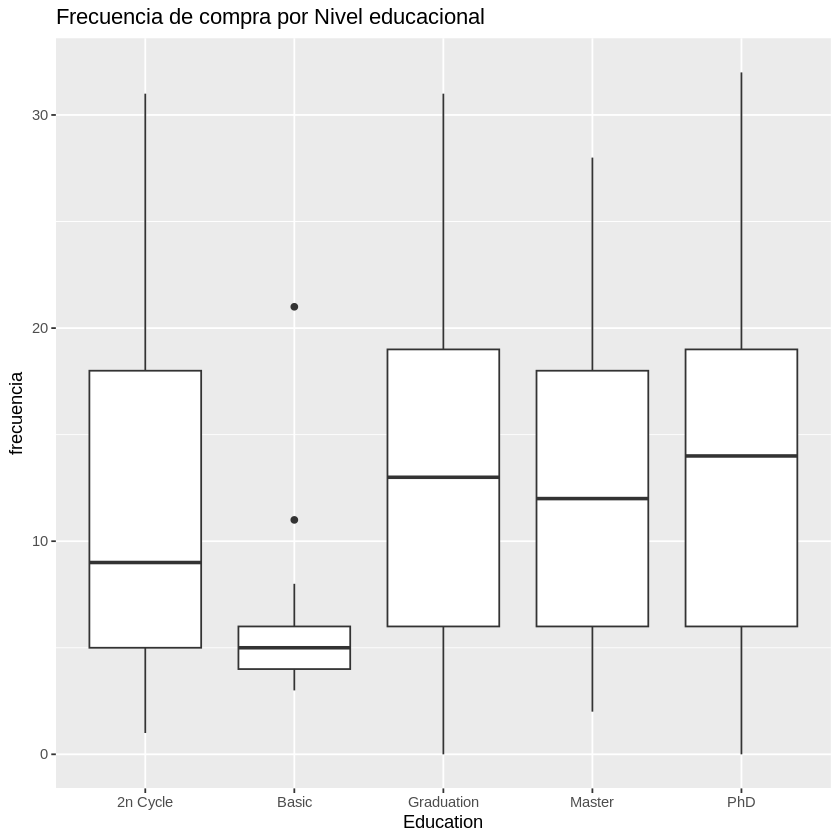

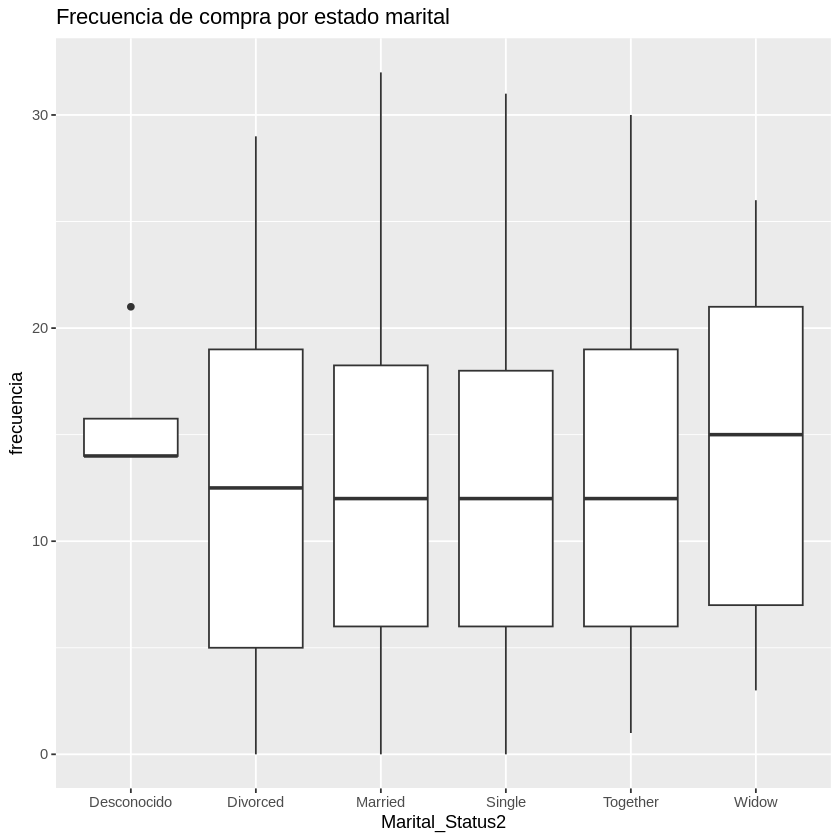

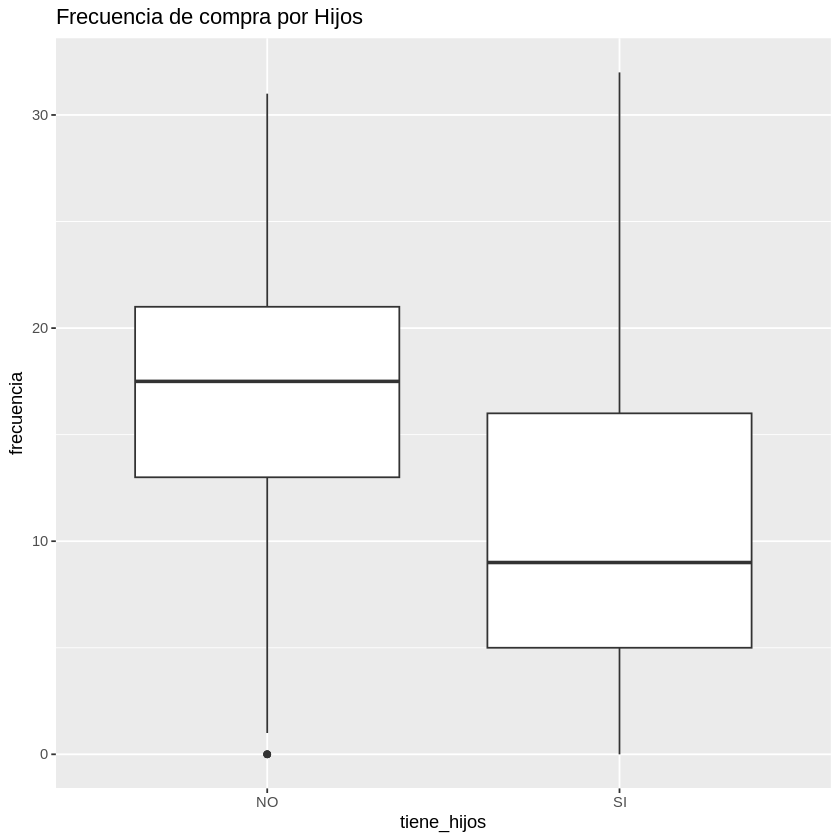

In [ ]:
## boxplots
ggplot(data = clientes, mapping = aes(x = Education, y =frecuencia)) + geom_boxplot()+labs(title = "Frecuencia de compra por Nivel educacional")
ggplot(data = clientes, mapping = aes(x = Marital_Status2, y =frecuencia)) + geom_boxplot()+labs(title = "Frecuencia de compra por estado marital")
ggplot(data = clientes, mapping = aes(x = tiene_hijos, y =frecuencia)) + geom_boxplot()+labs(title = "Frecuencia de compra por Hijos")

#Se observa la presencia de un potencial  registro atípico para el estaado Marital "desconocido", implicando que la frecuencia de compra "mediana", es mayor para los de estado viudo (widow) que para los de estado desconocido.


**P1c) (3pts)** Considerando sólo los clientes sin hijos, describa mediante un histograma de densidades la variable ingreso (`Income`). Considere ajustar la curva de densidad normal con los parámetros estimados para `mean` y `sd`. Basándose sólo en su gráfico, comente sobre la posibilidad que el ingreso siga una distribución normal. Para complementar su respuesta y visualización, considere añadir una estimación de la densidad a través de la función `geom_density()`.


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


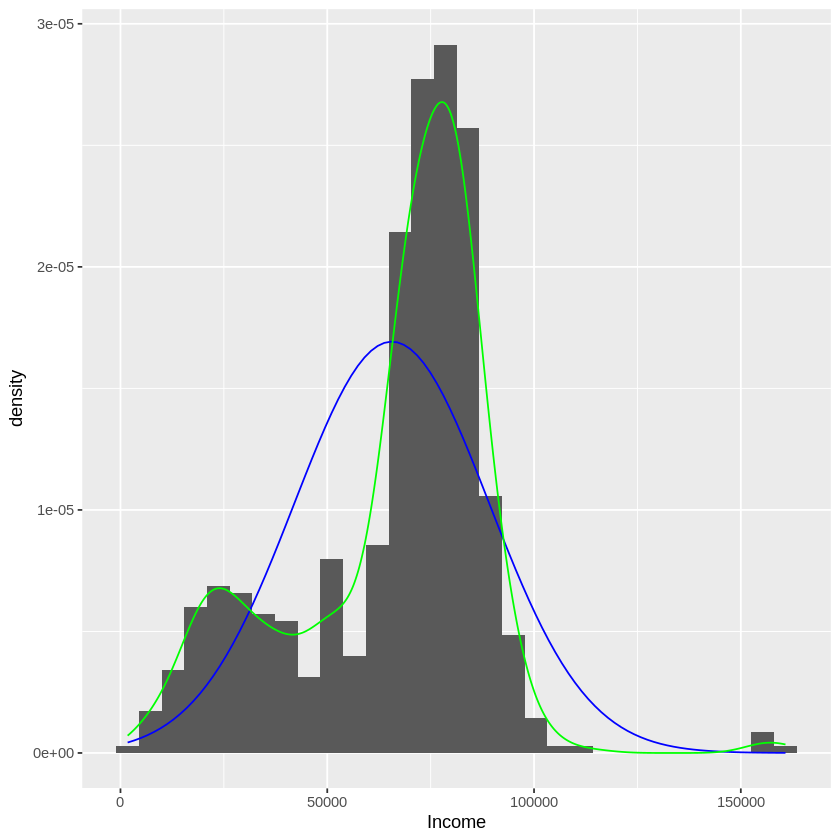

In [ ]:
aux <- clientes %>%
  filter(tiene_hijos == "NO")
income_sinH_prom <- mean(aux$Income)
income_sinH_sd <- sd(aux$Income)

aux %>%
  ggplot() +
    aes(x = Income) +
    geom_histogram(mapping = aes(y = after_stat(density)))+
    stat_function(fun = dnorm,
                  args = list(mean = income_sinH_prom, sd = income_sinH_sd),
                  col = "blue") +
    geom_density(col = "green")

  # Se observa que la estimación no paramétrica (verde) se aleja bastante de una distribución normal (azul), a la vez que el histograma muestra una distribución asimétrica, por lo que es poco probable que el ingreso de los clientes sin Hijos siga una distribución normal.

## Preguntas 1.2

Una manera de caracterizar a los clientes es mediante un análisis de las frecuencias de compra, su recencia y los montos de compra (RFM por sus siglas en inglés). Para ello, cada una de las variables que representan a estos conceptos en nuestro dataframe (`Recency`, `frecuencia` y `monto_total` ), deberán ser discretizadas, es decir, crear categorías para cada una de ellas. Esto lo podemos realizar mediante el cálculo de percentiles. <br>

Para este caso utilizaremos _quintiles_ (dividen la muestra en 5 grupos), y asignaremos a cada valor de cada una de las 3 vaiables anteriores el quintil al cual pertenece. Por ejemplo, si un cliente tiene un ingreso (`Income`) cuyo monto se encuentra en el 3er quintil de dicha variable, entonces a este registro se le asigna el valor 3. Esta asignación la podemos llevar a cabo con la función `ntile()`, la cual retorna justamente lo indicado.<br>

**P2a) (3pts)** Genere tres nuevas variables llamadas `recency_cat`, `freq_cat` y `Monto_cat` que contengan los quintiles al que pertenece cada registro de `Recency`, `frecuencia` y `monto_total` respectivamente.
Tenga en cuenta que valores en quintiles altos, serán preferibles para las variables monto_total y frecuencia, (clientes top), sin embargo, para recencia los quintiles bajos serán preferibles (clientes top), para lo cual considere `recency_cat = ntile(desc(Recency),5)`.<br>

Como referencia, los campos indocados deberán verse de la siguiente manera (cabecera):
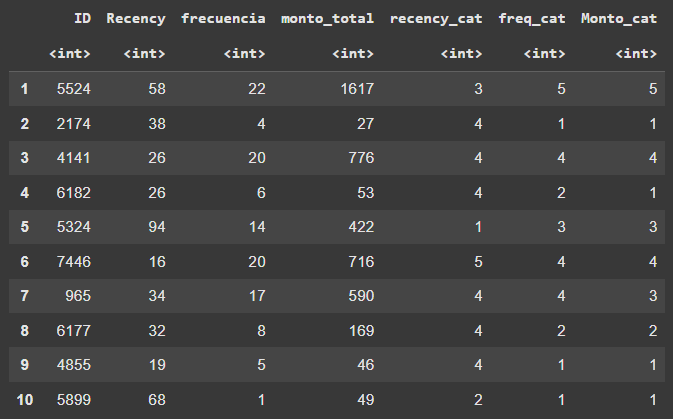

In [ ]:
# Respuesta
clientes <- clientes %>%
  mutate(
    recency_cat = ntile(desc(Recency),   5),
    freq_cat = ntile(frecuencia,  5),
    Monto_cat = ntile(monto_total,   5))

clientes %>% select (ID,Recency,frecuencia,monto_total, recency_cat,freq_cat,Monto_cat) %>% head(10)

,ID,Recency,frecuencia,monto_total,recency_cat,freq_cat,Monto_cat
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5524,58,22,1617,3,5,5
2,2174,38,4,27,4,1,1
3,4141,26,20,776,4,4,4
4,6182,26,6,53,4,2,1
5,5324,94,14,422,1,3,3
6,7446,16,20,716,5,4,4
7,965,34,17,590,4,4,3
8,6177,32,8,169,4,2,2
9,4855,19,5,46,4,1,1


**P2b) (1pts)** Una alternativa para caracterizar el comportamiento del cliente con base en estas 3 métricas, es asignándole un _score_. Este lo podemos definir como el promedio de `recency_cat`,	`freq_cat`	y `Monto_cat`, pero dada la estrategia de la tienda, sonde se le da una mayor importancia a los clientes que compran con más frecuencia, considere el **promedio ponderado** de la siguiente forma y guárdelo en un columna adicional llamada `score`.

    score = 0.2*recency_cat + 0.4*freq_cat + 0.4*Monto_cat

In [ ]:
# Respuesta
clientes <- clientes %>%
  mutate(score = 0.2*recency_cat + 0.4*freq_cat + 0.4*Monto_cat)

head(clientes)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,monto_total,frecuencia,tiene_hijos,RatioGastosIngresos,tasa_conversion_web,Marital_Status2,recency_cat,freq_cat,Monto_cat,score
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>
1,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,1617,22,NO,0.0278131343,0.3636364,Single,3,5,5,4.6
2,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,27,4,SI,0.0005825997,0.2500000,Single,4,1,1,1.6
3,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,776,20,NO,0.0108360214,0.4000000,Together,4,4,4,4.0
4,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,53,6,SI,0.0019890415,0.3333333,Together,4,2,1,2.0
5,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,422,14,SI,0.0072392912,0.3571429,Married,1,3,3,2.6
6,7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,716,20,SI,0.0114536176,0.3000000,Together,5,4,4,4.2


**P2c) (6pts)** ¿Cuáles son las catgorías de clientes con mayor y menor score para las variables `tiene_hijos` `Marital_Status2` y `Education`?. Complemente su análisis mediante gráficos de cajas (boxplots) y comente sobre las medianas del score, para las categorías con mayor/menor score.


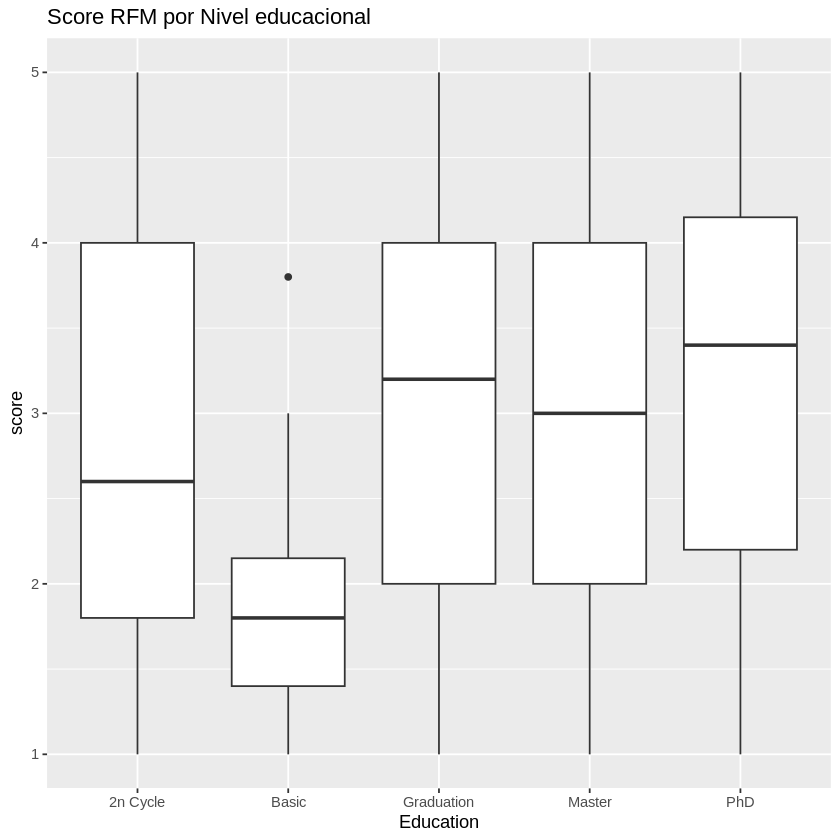

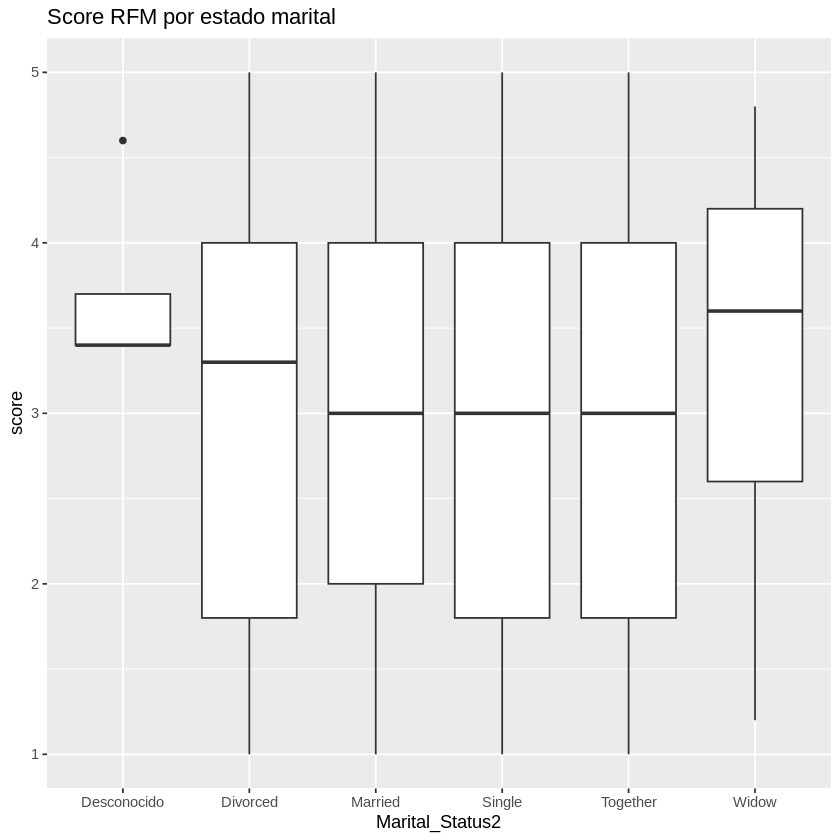

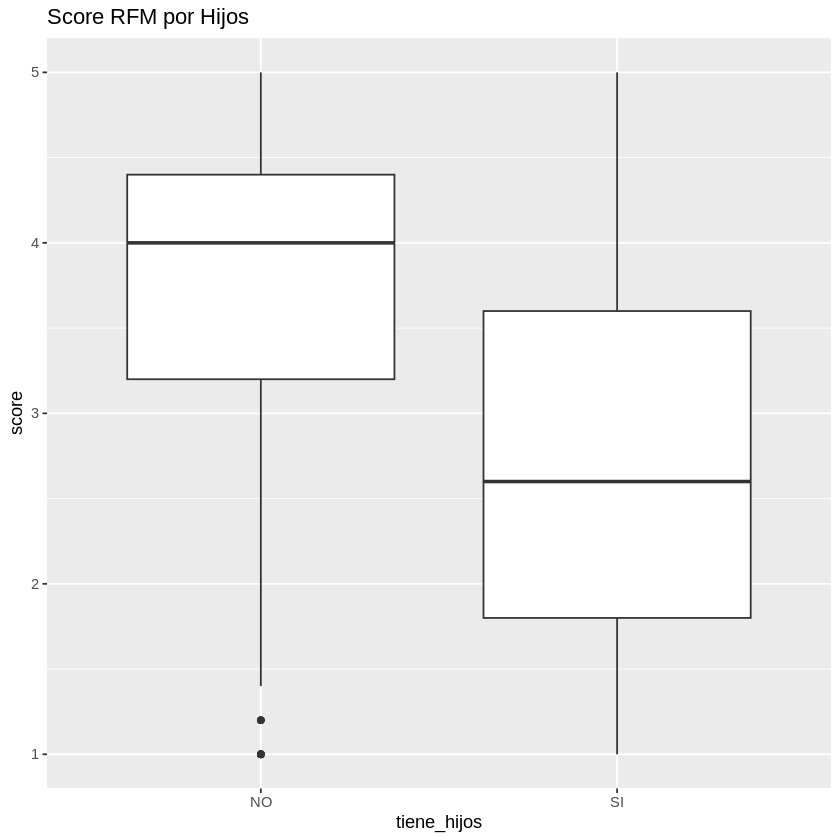

In [ ]:
# Respuesta
ggplot(data = clientes, mapping = aes(x = Education, y =score)) + geom_boxplot()+labs(title = "Score RFM por Nivel educacional")
ggplot(data = clientes, mapping = aes(x = Marital_Status2, y =score)) + geom_boxplot()+labs(title = "Score RFM por estado marital")
ggplot(data = clientes, mapping = aes(x = tiene_hijos, y =score)) + geom_boxplot()+labs(title = "Score RFM por Hijos")

#Se mantienen las conclusiones anteriores, y se observa que el mayor score se da en clientes con nivel educativo PhD, o Viudos, o sin hijos.

**P2d) (4pt)** Genere un gráfico de dispersión entre `score` y  la variable `RatioGastosIngresos`. ¿Qué observa?. Considere utilizar el criterio del rango intercuartílico para identificar posibles outliers de acuerdo a la variable `RatioGastosIngresos` en su dataset. Según este criterio, ¿cuáles son los IDs de los clientes potencialmente atípicos según su RatioGastosIngresos? Comente sobre sus scores y ratio de gastos. <br>

**P2e) (4pt)** Vuelva a generar el gráfico de dispersión anterior, pero filtrando (excluyendo) los clientes clasificados como outliers en la pregunta anterior. Añada una curva de tendencia, y calcule los coeficientes de correlación de pearson y spearman. Comente al respecto.

**P2f) (4pt)** Replique el gráfico de dispersión anterior (incluyendo la curva de tendencia) y considere aperturar por `color = Education`. ¿Qué nivel de educación presenta visualmente una mayor correlación? Justifique o Refute con el cálculo de la correlación de spearman y pearson para cada nivel educativo.



`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,monto_total,frecuencia,tiene_hijos,RatioGastosIngresos,tasa_conversion_web,Marital_Status2,recency_cat,freq_cat,Monto_cat,score
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>
5376,1979,Graduation,Married,2447,1,0,06-01-2013,42,1,⋯,1730,28,SI,0.70698815,0.00,Married,3,5,5,4.6
4246,1982,Master,Single,6560,0,0,12-12-2013,2,67,⋯,373,2,NO,0.05685976,0.50,Single,5,1,3,2.6
6237,1966,PhD,Single,7144,0,2,07-12-2013,92,81,⋯,416,25,SI,0.05823068,0.92,Single,1,5,3,3.4
10311,1969,Graduation,Married,4428,0,1,05-10-2013,0,16,⋯,359,25,SI,0.08107498,1.00,Married,5,5,3,4.2


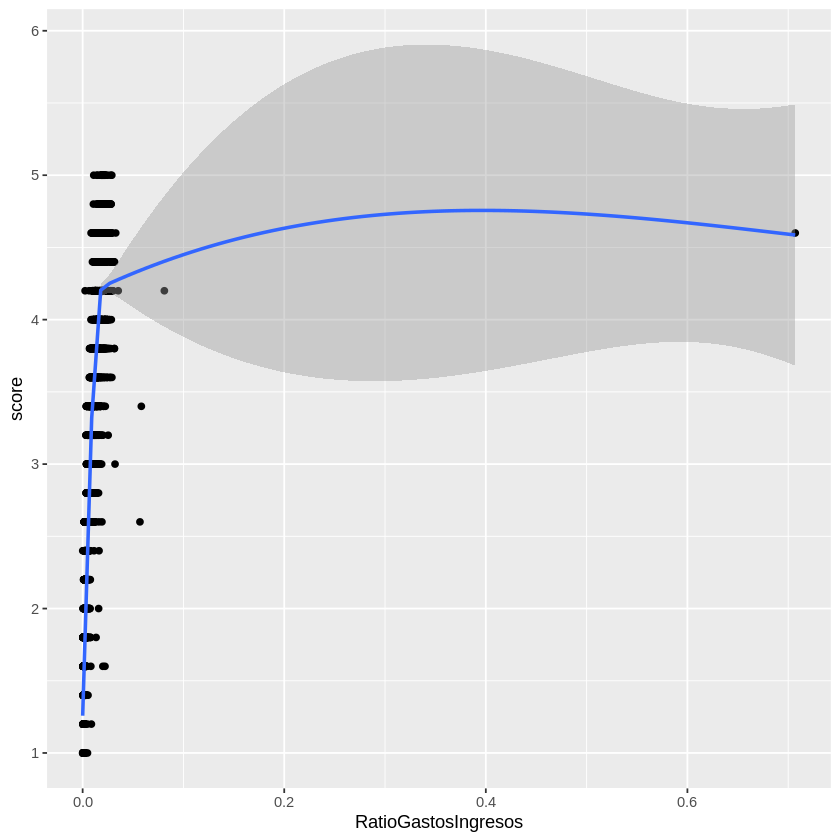

In [ ]:
# P2d) Respuesta
clientes %>%
  ggplot() +
  aes(x = RatioGastosIngresos, y = score) +
  geom_point() +
    geom_smooth()
# Se observa que el score tiene un comportamiento "discreto" por la forma en que fue calculado, por otro lado, se observan  registros con RatioGastosIngresos muy altos. Para identificarlos utilizaremos el criterio del IQR para determinar si es unposible outlier o no.

clientes %>%
  filter(RatioGastosIngresos >= quantile(clientes$RatioGastosIngresos, 0.75) + 1.5*IQR(RatioGastosIngresos))

# Se clasifican 4 clientes como potenciales outliers. Estos 4 presnetan un alto gasto de sus ingresos en productos de esta tienda. Llama la atención el cliente 5376, que gasta un 70% de sus ingresos en la tienda y tiene un score de 4.6. Es un cliente que compra con alta frecuencia, montos altos y su última compra fue hace poco tiempo. Es un cliente fidelizado y top!

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


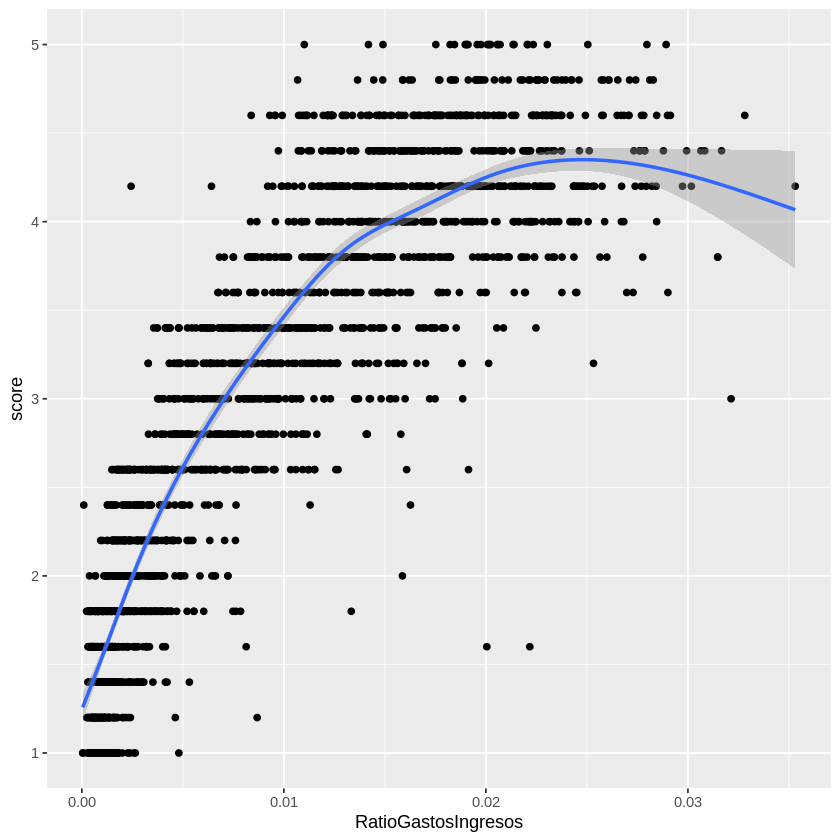

In [ ]:
# P2e) Respuesta
# se filtran los clientes anteriores y se grafica.
clientes %>%
  filter(!(ID %in% c(5376,4246,6237,10311) )) %>%
  ggplot() +
  aes(x = RatioGastosIngresos, y = score) +
  geom_point() +
  geom_smooth()

#En general se observa una dependencia creciente, salvo para valores altos del ratio de gastos.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


Education,corr_pearson,corr_spearman
<chr>,<dbl>,<dbl>
2n Cycle,0.8443710,0.8892425
Basic,0.7085895,0.6919321
Graduation,0.8695057,0.9044422
Master,0.8701993,0.9187543
PhD,0.8512254,0.8819440


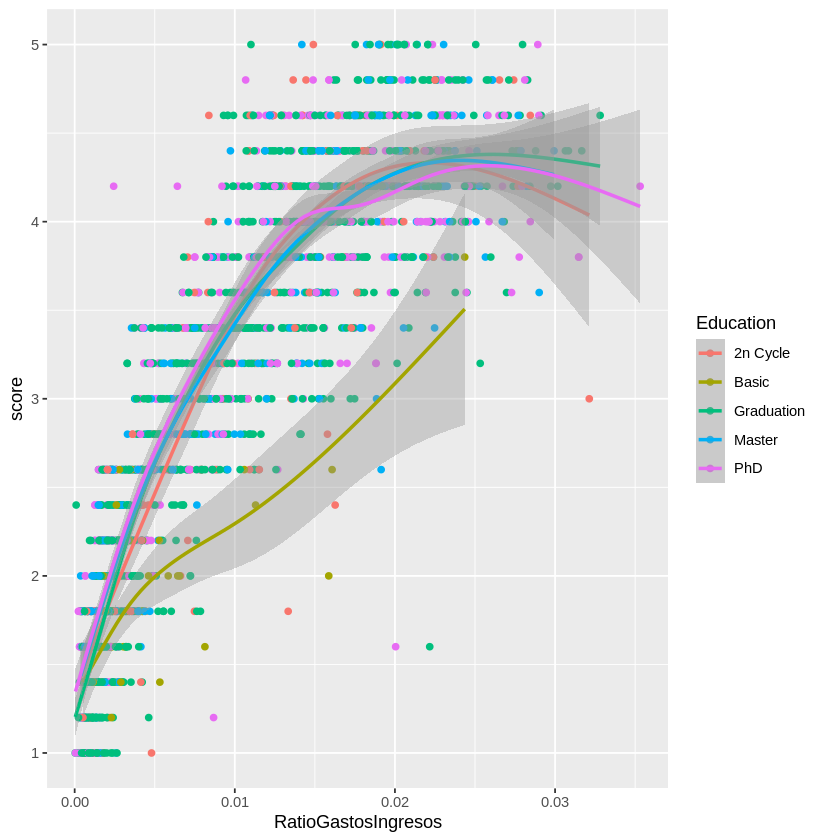

In [ ]:
# P2f) Respuesta
# se filtran los clientes anteriores y se grafica.
clientes %>%
  filter(!(ID %in% c(5376,4246,6237,10311) )) %>%
  ggplot() +
  aes(x = RatioGastosIngresos, y = score, color = Education) +
  geom_point() +
  geom_smooth()

# Correlaciones
  clientes %>%
  filter(!(ID %in% c(5376,4246,6237,10311) )) %>%
    group_by(Education) %>%
    summarise(corr_pearson = cor(RatioGastosIngresos, score),
              corr_spearman = cor(RatioGastosIngresos, score, method = "spearman"))

# Según el gráfico, Pareciera ser que "Basic" tiene una dependencia más "monótona" entre el ratio y el score, sin embargo la categoría con mayor nivel de correlación tanto para spearman y pearson es "Master".

# Sección 2
## Cafetería
A usted se le solicita analizar las ventas de los distintos productos ofrecidos por una cafetería. Para ello usted deberá generar una descripción de dichas ventas,utilizando estadísticos descriptivos, gráficos  y además deberá incluir un análisis de la venta cruzada de los productos en cuestión.

In [ ]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(arules)
library(dplyr)
library(ggplot2)
library(tidyr)


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




El siguiente archivo contiene los registros de las ventas de una cafetería en un determinado período.
Ustede deberá responder las siguientes preguntas con el objetivo de generar recomendaciones de ventas en distintos períodos de tiempo.

In [ ]:
#trans_original <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202504_Programacion_en_R_para_ciencia_de_datos/main/Evaluaciones/C3/datasets/cafeteria.csv")
trans_original  <- read.csv("cafeteria.csv")
summary(trans_original)

# Notamos que el item NONE aparece 786 veces, por lo que se decide eliminar este registro.

trans_original <- filter(trans_original, Item != "NONE")
trans_original %>% arrange(Transaction) %>% head(10)

     Date               Time            Transaction       Item          
 Length:21293       Length:21293       Min.   :   1   Length:21293      
 Class :character   Class :character   1st Qu.:2548   Class :character  
 Mode  :character   Mode  :character   Median :5067   Mode  :character  
                                       Mean   :4952                     
                                       3rd Qu.:7329                     
                                       Max.   :9684                     

,Date,Time,Transaction,Item
,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09:58:11,1,Bread
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:05:34,2,Scandinavian
4,2016-10-30,10:07:57,3,Hot chocolate
5,2016-10-30,10:07:57,3,Jam
6,2016-10-30,10:07:57,3,Cookies
7,2016-10-30,10:08:41,4,Muffin
8,2016-10-30,10:13:03,5,Coffee
9,2016-10-30,10:13:03,5,Pastry


**P1) (2pts)** Genere tres nuevas columnas, que contengan la hora, minutos  y segundos de la transacción registrada.
A modo de referencia, su tabla debería contener al menos los siguientes campos (en la imagen se muestran sólo algunos registros de la tabla).

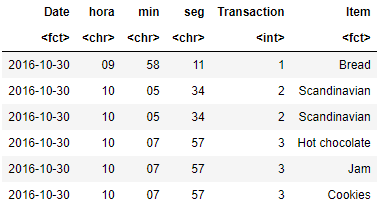

De ser de utilidad, puede consultar la documentación de las funciones substr y separate de los packages base y tidyr respectivamente.

In [ ]:
# P1 --------------------------------------------------
# Respuesta

trans_original <- trans_original %>%
    separate(Time, c("hora", "min","seg"),sep = ":")

head(trans_original)

,Date,hora,min,seg,Transaction,Item
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,2016-10-30,09,58,11,1,Bread
2,2016-10-30,10,05,34,2,Scandinavian
3,2016-10-30,10,05,34,2,Scandinavian
4,2016-10-30,10,07,57,3,Hot chocolate
5,2016-10-30,10,07,57,3,Jam
6,2016-10-30,10,07,57,3,Cookies


**P2) (4pts)**  Genere una tabla resumen que contenga la siguiente información.

* `hora`: Hora donde se registraron las transacciones. por ejemplo, el valor 09 indica el bloque horario comprendido entre las 09:00 y 09:59 hrs.
* `total_trx` : total de transacciones distintas generadas en el bloque horario respectivo.
* `total_items`: total de items vendidos en el bloque horario respectivo.
* `total_items_unicos`: total de items únicos venidos en el bloque horario respectivo.


In [ ]:
# P2 --------------------------------------------------
# Respuesta

resumen <- trans_original %>%
    group_by(hora) %>%
    summarise(total_trx = length(unique(Transaction)),
              total_item = n(),
              total_items_unicos = length(unique(Item))) %>%
    arrange(-total_trx)


resumen %>% arrange(hora)

hora,total_trx,total_item,total_items_unicos
<chr>,<int>,<int>,<int>
01,1,1,1
07,16,24,5
08,375,645,42
09,1006,1966,48
10,1266,2666,63
11,1439,3102,65
12,1325,2854,65
13,1143,2617,68
14,1120,2640,67


**P3)** Con base en la tabla anterior, diremos que una hora pertenece al horario punta si la **cantidad de transacciones distintas** generadas en dicho bloque supera las 1000 transacciones.

**a) (1pt)** ¿Qué horas comprende el horario punta?<br>
**b) (2pt)** En promedio, ¿cuántas transacciones distintas por hora se dieron en horario punta?¿y en horario no punta?


In [ ]:
# P3 --------------------------------------------------
# Respuesta
#a)
filter(resumen,total_trx >= 1000) # Corresponde al bloque horario comprendido entre las 9:00 y las 14:59 hrs
#b)
# Con hora punta se da una tasa de 1226.5 transaciones por hora en promedio, mientras que en horario normal la tasa fue de 181 transacciones por hora en promedio.
resumen %>%
    mutate(hora_punta = ifelse(hora %in% c("09","10","11","12","13","14"),"hora punta","normal" )) %>%
    group_by(hora_punta) %>%
    summarise(tasa_trx_hra = mean(total_trx),
             coef_var = sd(total_trx)/mean(total_trx),
             sd = sd(total_trx))

# 1216.5 transacciones promedio por hora en horario punta, versus 180.5 transacciones promedio por hora en horario normal

hora,total_trx,total_item,total_items_unicos
<chr>,<int>,<int>,<int>
11,1439,3102,65
12,1325,2854,65
10,1266,2666,63
13,1143,2617,68
14,1120,2640,67
09,1006,1966,48


hora_punta,tasa_trx_hra,coef_var,sd
<chr>,<dbl>,<dbl>,<dbl>
hora punta,1216.5,0.1288012,156.6866
normal,180.5,1.6397624,295.9771


### Análisis de los productos vendidos.
Con el objetivo de aumentar las ventas, se le solicita a usted analizar los itmes y las ventas cruzadas entre los productos ofrecidos. Para ello usted guía su análisis en función de las siguientes preguntas.

**P4) (2pt)** ¿Cuáles son los 5 items más vendidos? Ilustre mediante un gráfico de barras o una tabla.

,Item,n
,<chr>,<int>
1,Coffee,5471
2,Bread,3325
3,Tea,1435
4,Cake,1025
5,Pastry,856


Warning message in asMethod(object):
“removing duplicated items in transactions”


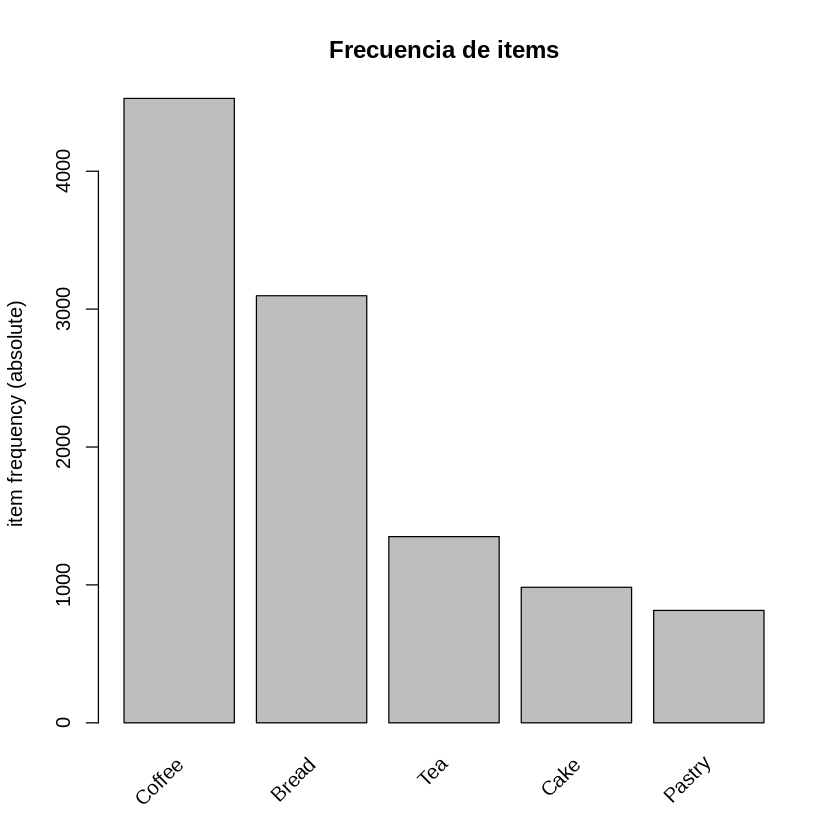

In [ ]:
# Respuesta

# Opción a) sin convertir a objeto transactions

trans_original %>%
    count(Item) %>%
    arrange(-n) %>%
    head(5)

# Opción b) convirtiendo tras_original a objeto transaction

## NOTA LOS N CAMBIAN YA QUE EN ESTA SEGUNDA FORMA SE ELIMINAN DUPLICADOS Y EL CONTEO SE HACE A NIVEL DE BOLETA

tr <- as(split(trans_original[,"Item"], trans_original[,"Transaction"]), "transactions")

itemFrequencyPlot(tr,
                  topN=5,
                  type="absolute",
                  main="Frecuencia de items")

**P5) (4pts)** ¿Cambian estos 5 ítems según el horario de atención? Para ello muestre los 5 items más vendidos en los siguientes horarios.

* 7:00-11:59
* 12:00-16:59
* 17:00-23:59

,Item,n
,<chr>,<int>
1,Coffee,1779
2,Bread,1038
3,Pastry,356
4,Tea,332
5,Medialuna,239


,Item,n
,<chr>,<int>
1,Coffee,2823
2,Bread,1661
3,Tea,930
4,Cake,731
5,Sandwich,671


,Item,n
,<chr>,<int>
1,Coffee,87
2,Bread,54
3,Tea,49
4,Cake,30
5,Hot chocolate,23


Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”


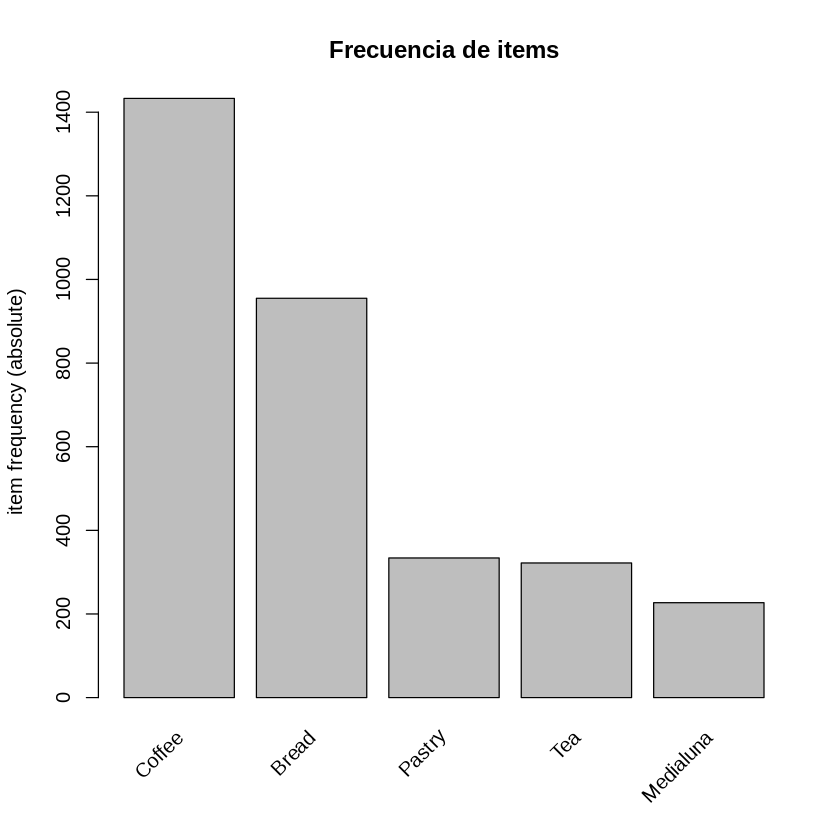

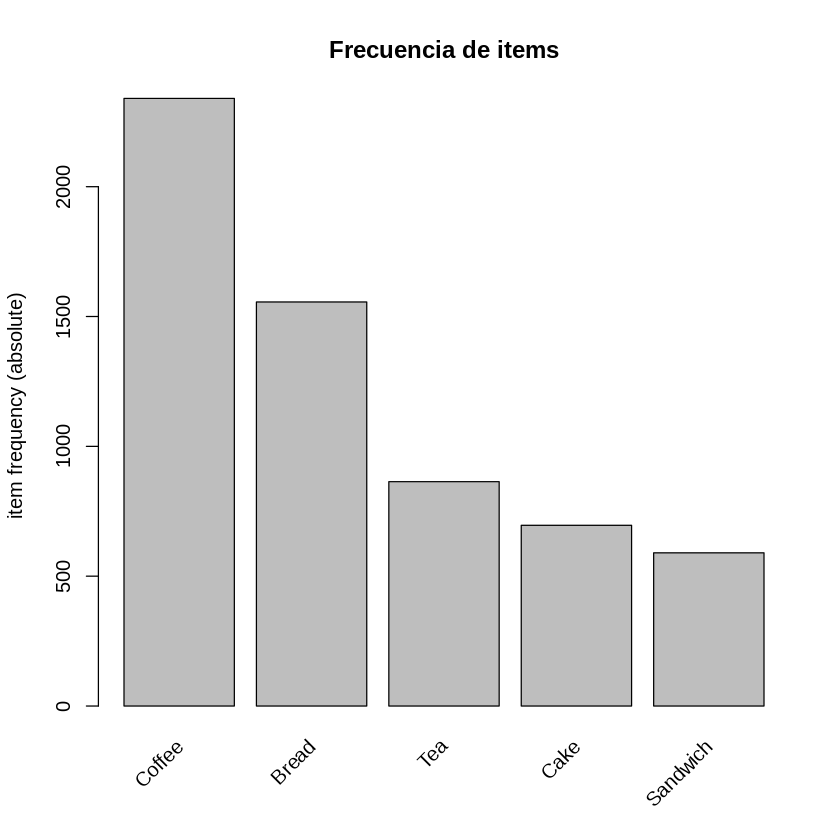

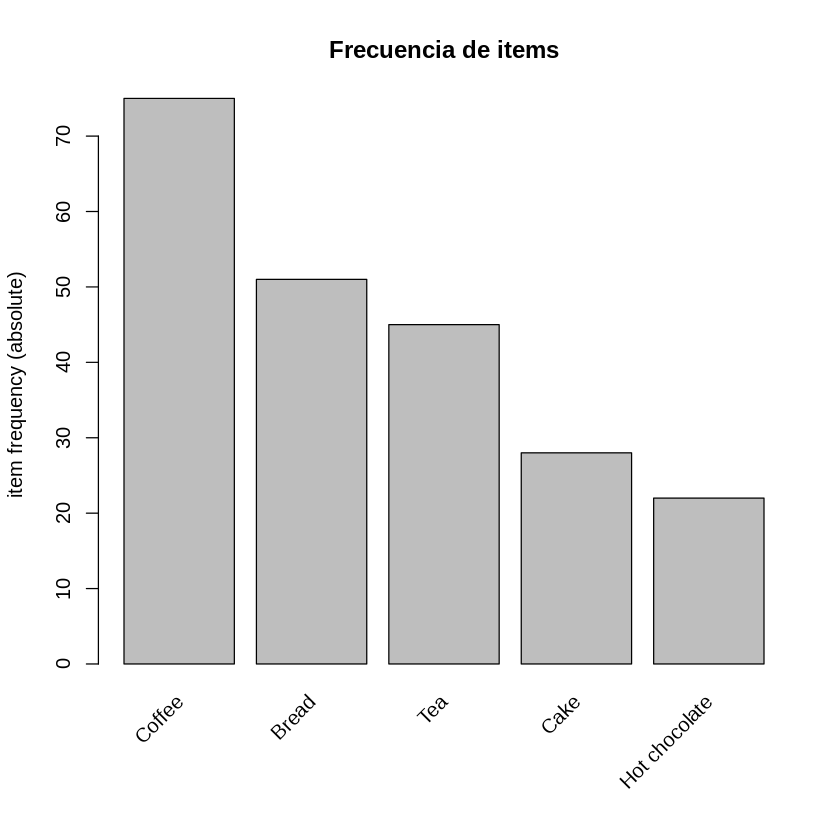

In [ ]:
# Respuesta

# (1p por filtrar)
df1 <- filter(trans_original, strtoi(hora) >= 7  & strtoi(hora) <=11)
df2 <- filter(trans_original, strtoi(hora) >= 12 & strtoi(hora) <=16)
df3 <- filter(trans_original, strtoi(hora) >= 17 & strtoi(hora) <=23)

# Opcion a) Sin convertir a transactions
# 1p c/u
df1 %>%
    count(Item) %>%
    arrange(-n) %>%
    head(5)

df2 %>%
    count(Item) %>%
    arrange(-n) %>%
    head(5)

df3 %>%
    count(Item) %>%
    arrange(-n) %>%
    head(5)

# Opción b) convirtiendo a transactions

#0.5 c/u
tr1 <- as(split(df1[,"Item"], df1[,"Transaction"]), "transactions")
tr2 <- as(split(df2[,"Item"], df2[,"Transaction"]), "transactions")
tr3 <- as(split(df3[,"Item"], df3[,"Transaction"]), "transactions")

#0.5 c/u
itemFrequencyPlot(tr1,
                  topN=5,
                  type="absolute",
                  main="Frecuencia de items")

itemFrequencyPlot(tr2,
                  topN=5,
                  type="absolute",
                  main="Frecuencia de items")

itemFrequencyPlot(tr3,
                  topN=5,
                  type="absolute",
                  main="Frecuencia de items")

## Respuesta final (si no da respuesta y sólo muestra tablas o grágicos, descontar 1p)

#Si se observan cambios en los productos vendidos en cada horario definido.
#Siendo Coffe y Bread los dos más vendidos siempre, pero los siguientes 3 items varían:

#Horario1: Pastry, Tea, medialuna
#Horario2: Tea, cake, sandwich
#Horario3: Tea, cake, hot chocolate


### Genereación de reglas

**P6)** Considerando un **support mínimo de 0.02** , un  **confidence mínimo de 0.1** y teniendo en cuenta que **no se deben considerar reglas de asociación cuyo antecedente o consecuente sean vacíos**,

**a) (2pts)** ¿Cuál es la regla de asociación más frecuente en cada uno de los horarios indicados en **P5)**?<br>
**b) (2pts)** ¿Cuál es la regla de asociación con mayor confidence en cada uno de los horarios indicados en **P5)**? <br>
**c) (2pts)** ¿Cuál es la regla de asociación con mayor lift en cada uno de los horarios indicados en **P5)**? <br>

**NOTA:** En caso de no obtener reglas con los parámetros indicados, modifíquelos, pero tenga en consideración este hecho al momento de argumentar las preguntas posteriores.

In [ ]:
# Respuesta
## a)
# Las asociaciones más frecuentes corresponden a {Bread} => {Coffee} ,
#salvo en el último horario donde la regla más frecuente es {Cake} => {Coffee}

# en esta ocasión es necesario convertir a objetos tipo transactions
tr1 <- as(split(df1[,"Item"], df1[,"Transaction"]), "transactions")
tr2 <- as(split(df2[,"Item"], df2[,"Transaction"]), "transactions")
tr3 <- as(split(df3[,"Item"], df3[,"Transaction"]), "transactions")


reglas_1 <- apriori( data=tr1,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2)
       )

reglas_2 <- apriori( data=tr2,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2)
       )

reglas_3 <- apriori( data=tr3,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2)
       )

Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”
Warning message in asMethod(object):
“removing duplicated items in transactions”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 54 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[73 item(s), 2721 transaction(s)] done [0.00s].
sorting and recoding items ... [17 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
   

In [ ]:
head(sort(reglas_1,by="support",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 1: {Bread} => {Coffee}
head(sort(reglas_2,by="support",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 2: {Bread} => {Coffee}
head(sort(reglas_3,by="support",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 3: {Cake} => {Coffee}

    lhs        rhs      support   confidence coverage  lift      count
[1] {Bread} => {Coffee} 0.1010658 0.2879581  0.3509739 0.5467788 275  
    lhs        rhs      support    confidence coverage  lift      count
[1] {Bread} => {Coffee} 0.08999803 0.2943445  0.3057575 0.6401363 458  
    lhs       rhs      support    confidence coverage  lift count
[1] {Cake} => {Coffee} 0.05860806 0.5714286  0.1025641 2.08 16   


In [ ]:
# Respuesta
## b)

head(sort(reglas_1,by="confidence",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 1:{Toast} => {Coffee}
head(sort(reglas_2,by="confidence",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 2:{Pastry} => {Coffee}
head(sort(reglas_3,by="confidence",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 3:{Postcard} => {Tshirt}

    lhs        rhs      support    confidence coverage  lift     count
[1] {Toast} => {Coffee} 0.03160603 0.7350427  0.0429989 1.395709 86   
    lhs         rhs      support    confidence coverage   lift   count
[1] {Pastry} => {Coffee} 0.02554529 0.5579399  0.04578503 1.2134 130  
    lhs           rhs      support    confidence coverage   lift count
[1] {Postcard} => {Tshirt} 0.02197802 0.6        0.03663004 7.8  6    


In [ ]:
#Respuesta
## c)
head(sort(reglas_1,by="lift",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 1:{Toast} => {Coffee}
head(sort(reglas_2,by="lift",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 2:{Cake} => {Tea}
head(sort(reglas_3,by="lift",decreasing=TRUE),1) %>% inspect() # regla más frecuente en horario 3:{Tshirt} => {Postcard}

    lhs        rhs      support    confidence coverage  lift     count
[1] {Toast} => {Coffee} 0.03160603 0.7350427  0.0429989 1.395709 86   
    lhs       rhs   support    confidence coverage  lift    count
[1] {Cake} => {Tea} 0.03261938 0.2385057  0.1367656 1.40481 166  
    lhs         rhs        support    confidence coverage   lift count
[1] {Tshirt} => {Postcard} 0.02197802 0.2857143  0.07692308 7.8  6    


**P7)** Se quiere potenciar un segundo producto por la compra de un café en los tres horarios definidos previamente.

**a) (3pts)** Genere tres listados (uno por cada rango horario) con todas las reglas que contengan el producto `Coffee` en el antecedente.<br>
**b) (2pts)** ¿Qué promoción recomendaría en cada horario por la compra de un café?. Justifique su respuesta basándose en los indicadores support, confidence y lift.


In [ ]:
# Respuesta
## a)
reglas_coffe1 <- apriori( data=tr1,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2),
                  appearance = list(default="rhs",lhs="Coffee"),
                  control = list (verbose=F))
reglas_coffe2 <- apriori( data=tr2,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2),
                  appearance = list(default="rhs",lhs="Coffee"),
                  control = list (verbose=F))
reglas_coffe3 <- apriori( data=tr3,
                  parameter=list (supp=0.02,conf = 0.1,minlen=2),
                  appearance = list(default="rhs",lhs="Coffee"),
                  control = list (verbose=F))

inspect(reglas_coffe1)
inspect(reglas_coffe2)
inspect(reglas_coffe3)

    lhs         rhs      support    confidence coverage  lift      count
[1] {Coffee} => {Pastry} 0.07203234 0.1367760  0.5266446 1.1142739 196  
[2] {Coffee} => {Bread}  0.10106578 0.1919051  0.5266446 0.5467788 275  
    lhs         rhs        support    confidence coverage  lift      count
[1] {Coffee} => {Sandwich} 0.06229122 0.1354701  0.4598153 1.1684869 317  
[2] {Coffee} => {Cake}     0.07191983 0.1564103  0.4598153 1.1436376 366  
[3] {Coffee} => {Tea}      0.05718216 0.1243590  0.4598153 0.7324801 291  
[4] {Coffee} => {Bread}    0.08999803 0.1957265  0.4598153 0.6401363 458  
    lhs         rhs             support    confidence coverage  lift      count
[1] {Coffee} => {Alfajores}     0.03296703 0.1200000  0.2747253 2.0475000  9   
[2] {Coffee} => {Hot chocolate} 0.03296703 0.1200000  0.2747253 1.4890909  9   
[3] {Coffee} => {Cookies}       0.03296703 0.1200000  0.2747253 1.6380000  9   
[4] {Coffee} => {Cake}          0.05860806 0.2133333  0.2747253 2.0800000 16   
[5] {C

**Respuesta**

**b)**
Esta es una pregunta abierta, y las opciones de respuestas pueden ser varias. A modo de ejemplo, basándose en el listado anterior, algunas opciones serían:

   1. Optar por la asociación con mayor lift,dado que se asume que todas las reglas ya cumplen el mínimo deseable de support y confidence <br>
       * Horario 1: {Coffee} =&gt; {Pastry}
       * Horario 2: {Coffee} =&gt; {Sandwich}
       * Horario 3: {Coffee} =&gt; {Cake}
   2. Optar por aquellas relaciones con alto lift, pero que a la vez no se encuentren dentro de las más frecuentas (pregunta **P3.4.a** asumiendo que las relaciones frecuentes no es necesario potenciarlas aun más (todo dependerá del negocio):<br>
       * Horario 1: {Coffee} =&gt; {Pastry}
       * Horario 2: {Coffee} =&gt; {Sandwich}
       * Horario 3: {Coffee} =&gt; {Alfajores}
